In [3]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('USArrests.csv')

# Simple DF Modifications 

In [4]:
df.rename(columns={'Unnamed: 0' : 'State'}, inplace=True)
df['Total_Arrests']= df["Murder"]+df["Assault"]+df["Rape"]
#df.drop(['Total_Arrests'], axis = 1,inplace=True)

# Data Overview

In [5]:
df.shape

(50, 6)

In [6]:
df.head()

,State,Murder,Assault,UrbanPop,Rape,Total_Arrests
0,Alabama,13.2,236,58,21.2,270.4
1,Alaska,10.0,263,48,44.5,317.5
2,Arizona,8.1,294,80,31.0,333.1
3,Arkansas,8.8,190,50,19.5,218.3
4,California,9.0,276,91,40.6,325.6


<AxesSubplot:xlabel='Total_Arrests', ylabel='State'>

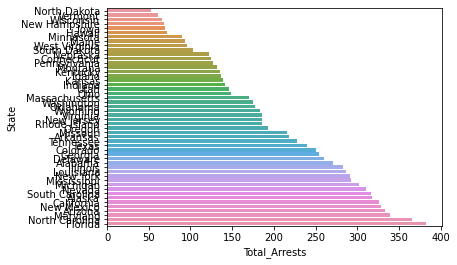

In [7]:
sns.barplot(data= df.sort_values(['Total_Arrests']), y='State', x='Total_Arrests')

In [8]:
df.drop(['Total_Arrests'], axis = 1,inplace=True)
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [9]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


<AxesSubplot:>

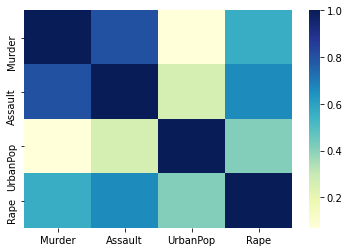

In [10]:
sns.heatmap(df.corr(),cmap="YlGnBu")

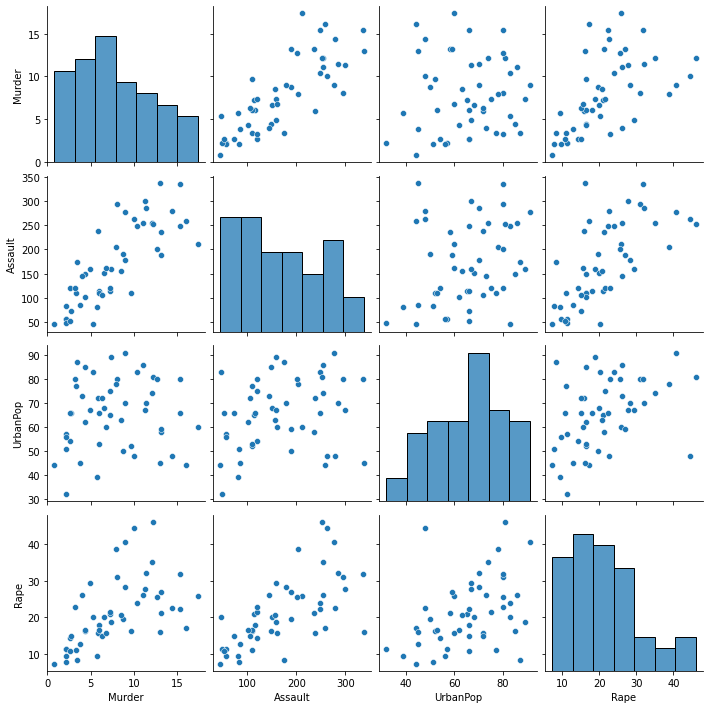

In [11]:
sns.pairplot(df); 

# Preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler
df_numeric = df.drop(['State'], axis=1)
df_numeric = df_numeric.drop(['UrbanPop'], axis=1)

scaler = StandardScaler()
df_numeric =scaler.fit_transform(df_numeric)

In [13]:
X = scaler.fit_transform(df[['Murder', 'Assault', 'Rape', 'UrbanPop']])

# K-Means

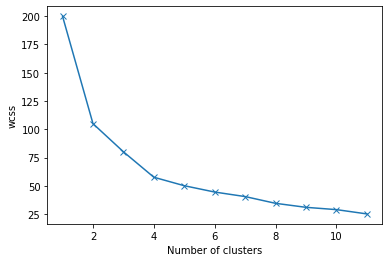

In [14]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
silohuette = []
wcss = []
for i in range(1, 12):
    km = KMeans(
        n_clusters=i, init='k-means++',
         )
    km.fit(X)
    wcss.append(km.inertia_)
    if(i>1):
        silohuette.append(silhouette_score(X,km.labels_,metric='euclidean'))

# plot
plt.plot(range(1, 12), wcss, marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


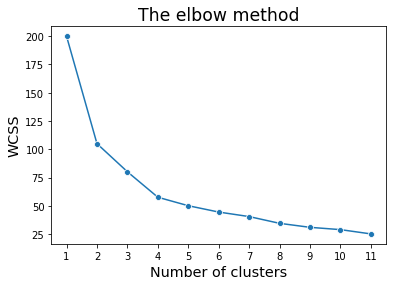

In [15]:
# plt.figure(figsize=(15,10))   //size for the graph 
ax=plt.axes()
sns.lineplot(x=range(1,12),y=wcss,marker='o')

ax.set_title("The elbow method",fontsize='xx-large')
ax.set_xlabel("Number of clusters",fontsize='x-large')
ax.set_ylabel("WCSS",fontsize='x-large')
ax.set_xticks(range(1,12));

In [16]:
len(silohuette)

10

Text(0, 0.5, 'silohuette')

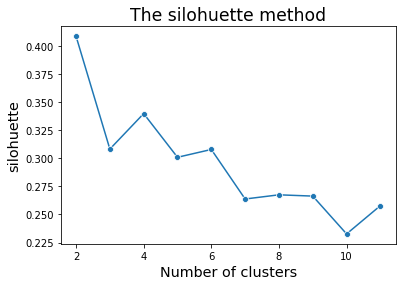

In [17]:
ax=plt.axes()
sns.lineplot(x=range(2,12),y=silohuette,marker='o')

ax.set_title("The silohuette method",fontsize='xx-large')
ax.set_xlabel("Number of clusters",fontsize='x-large')
ax.set_ylabel("silohuette",fontsize='x-large')
# ax.set_xticks(range(2,11));

In [18]:
km = KMeans(
    n_clusters=2, init='k-means++'    
)
y_km = km.fit_predict(X)

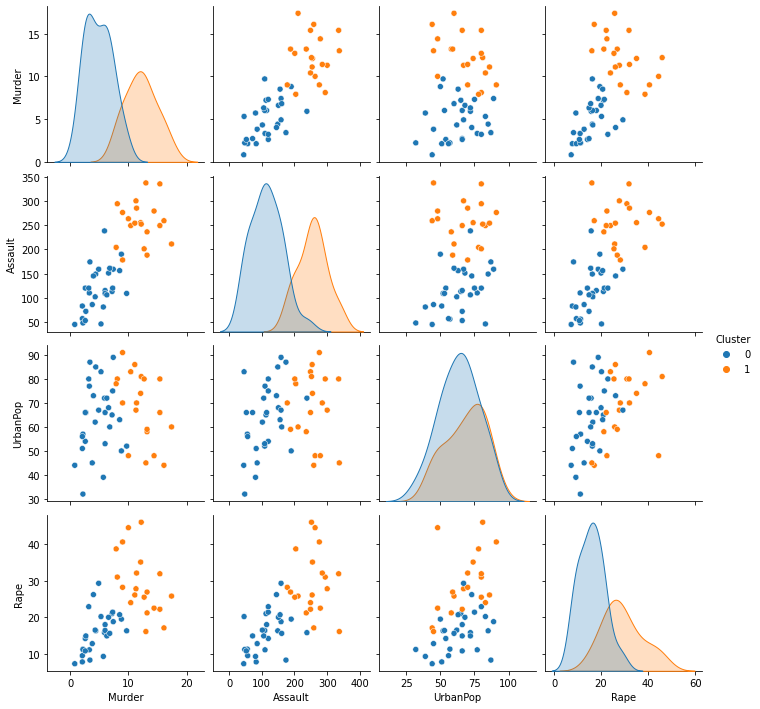

In [19]:
df['Cluster'] = km.labels_
sns.pairplot(df, hue='Cluster'); 

In [20]:
df[df['Cluster']==1]['State']

0            Alabama
1             Alaska
2            Arizona
4         California
5           Colorado
8            Florida
9            Georgia
12          Illinois
17         Louisiana
19          Maryland
21          Michigan
23       Mississippi
24          Missouri
27            Nevada
30        New Mexico
31          New York
32    North Carolina
39    South Carolina
41         Tennessee
42             Texas
Name: State, dtype: object

In [21]:
df['Cluster'].value_counts()

0    30
1    20
Name: Cluster, dtype: int64

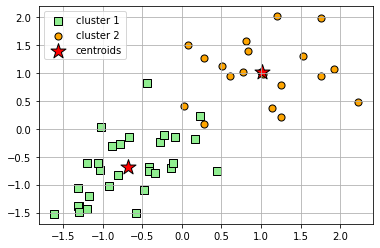

In [22]:
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plt.scatter(
#     X[y_km == 2, 0], X[y_km == 2, 1],
#     s=50, c='lightblue',
#     marker='v', edgecolor='black',
#     label='cluster 3'
# )
# plt.scatter(
#     X[y_km == 3, 0], X[y_km == 3, 1],
#     s=50, c='grey',
#     marker='d', edgecolor='black',
#     label='cluster 4'
# )

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

# Agglomerative Clustering

In [23]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import numpy as np

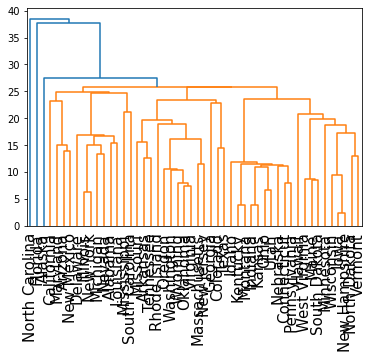

In [24]:
ytdist = df.drop(['State'],axis=1)
Z = hierarchy.linkage(ytdist, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z,leaf_font_size=15,labels=list(df['State']),leaf_rotation=90)

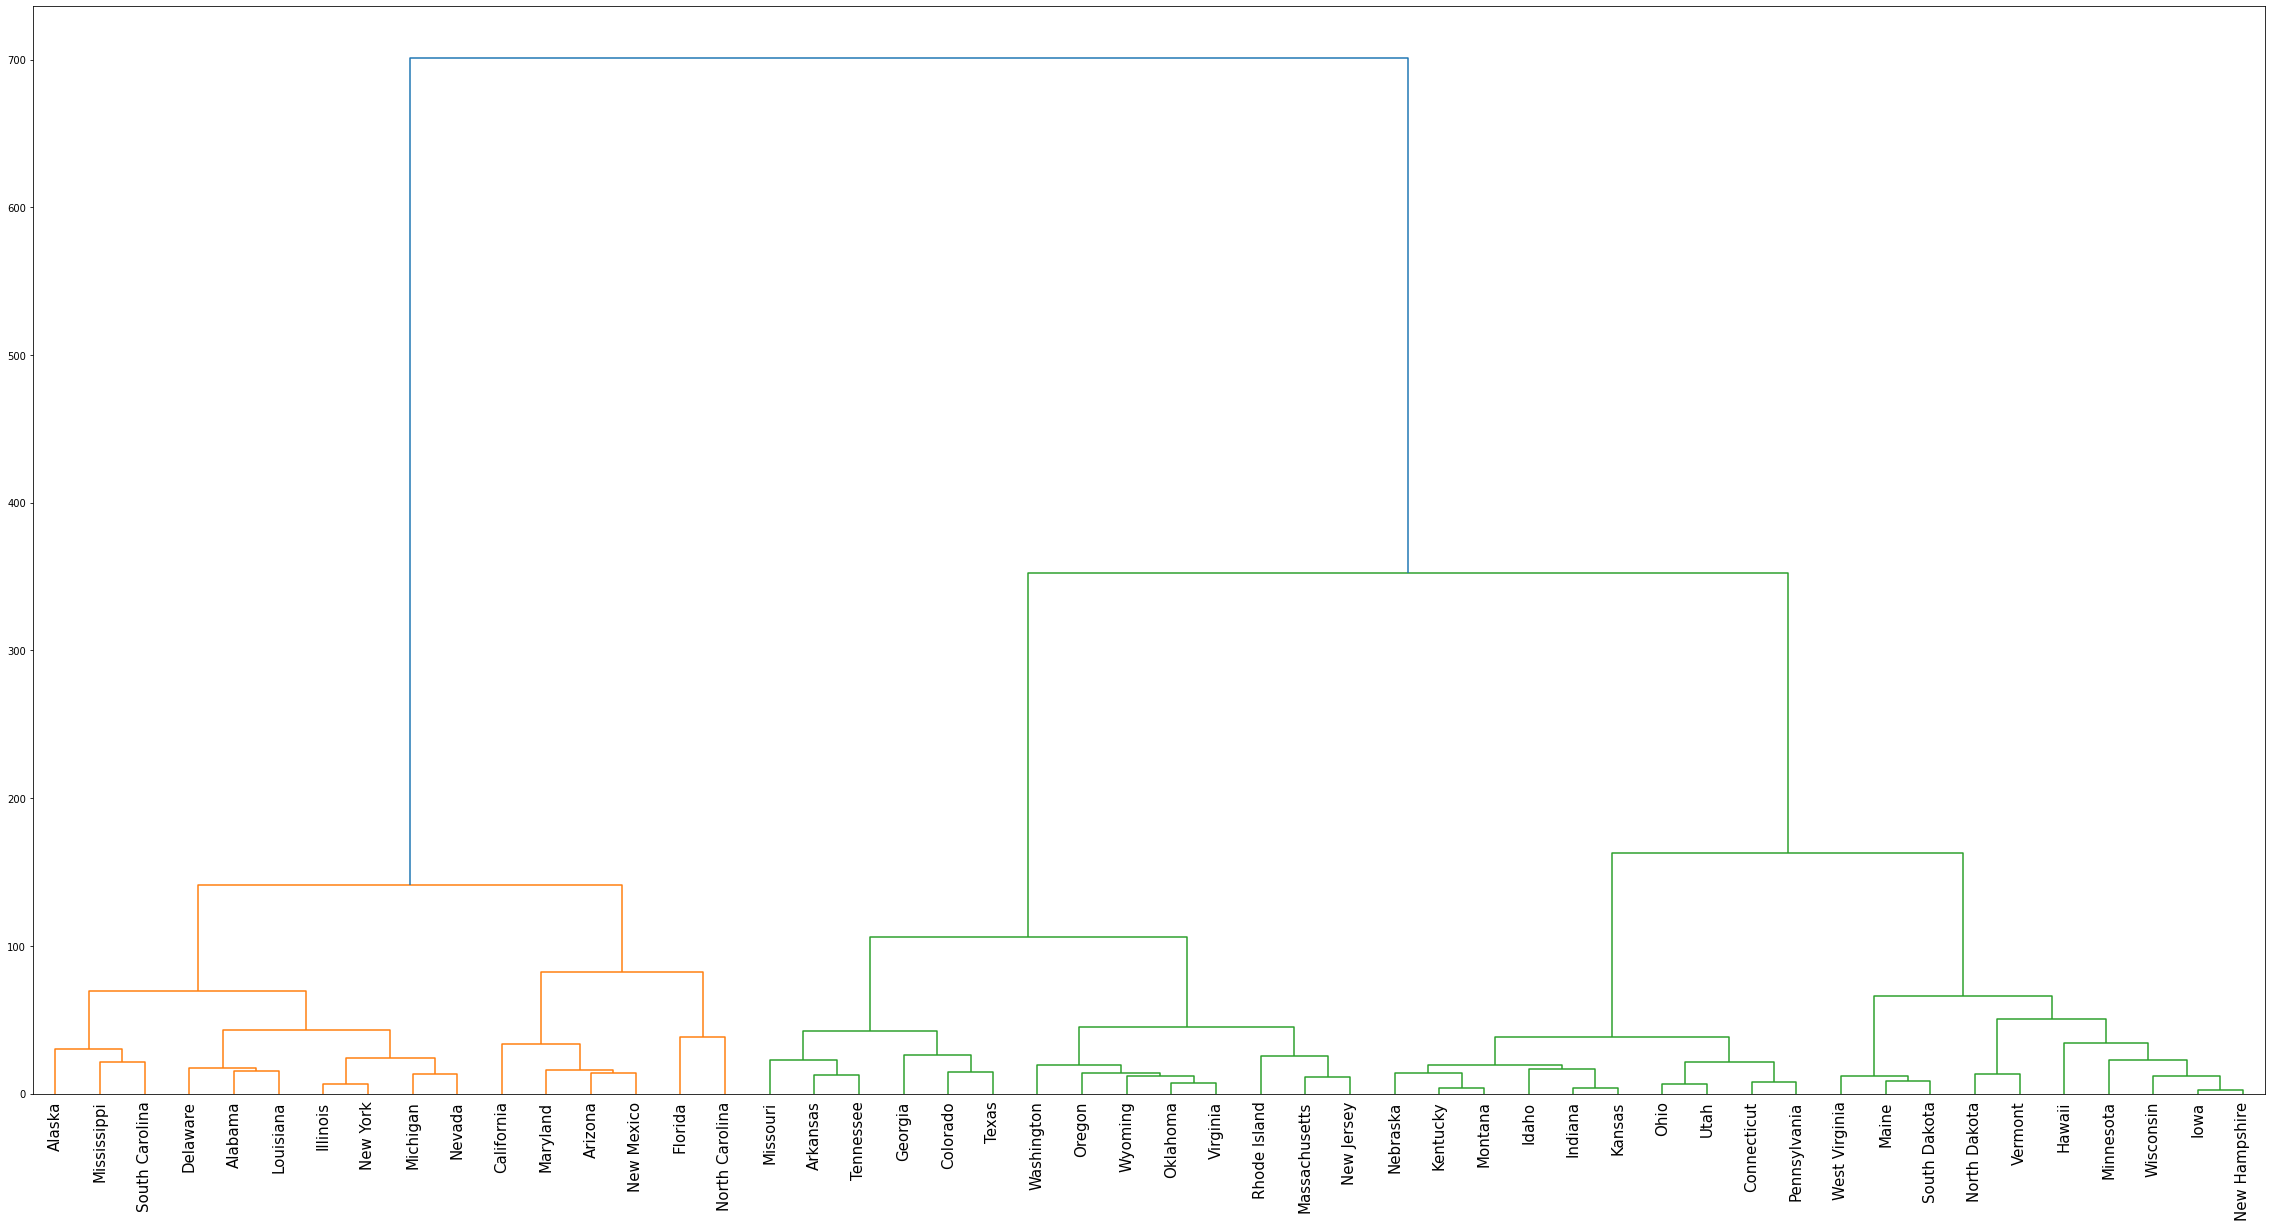

In [25]:
Z = hierarchy.linkage(ytdist, 'ward','euclidean')
plt.figure(figsize=(40,20))
dn = hierarchy.dendrogram(Z,leaf_font_size=15,labels=list(df['State']),leaf_rotation=90)

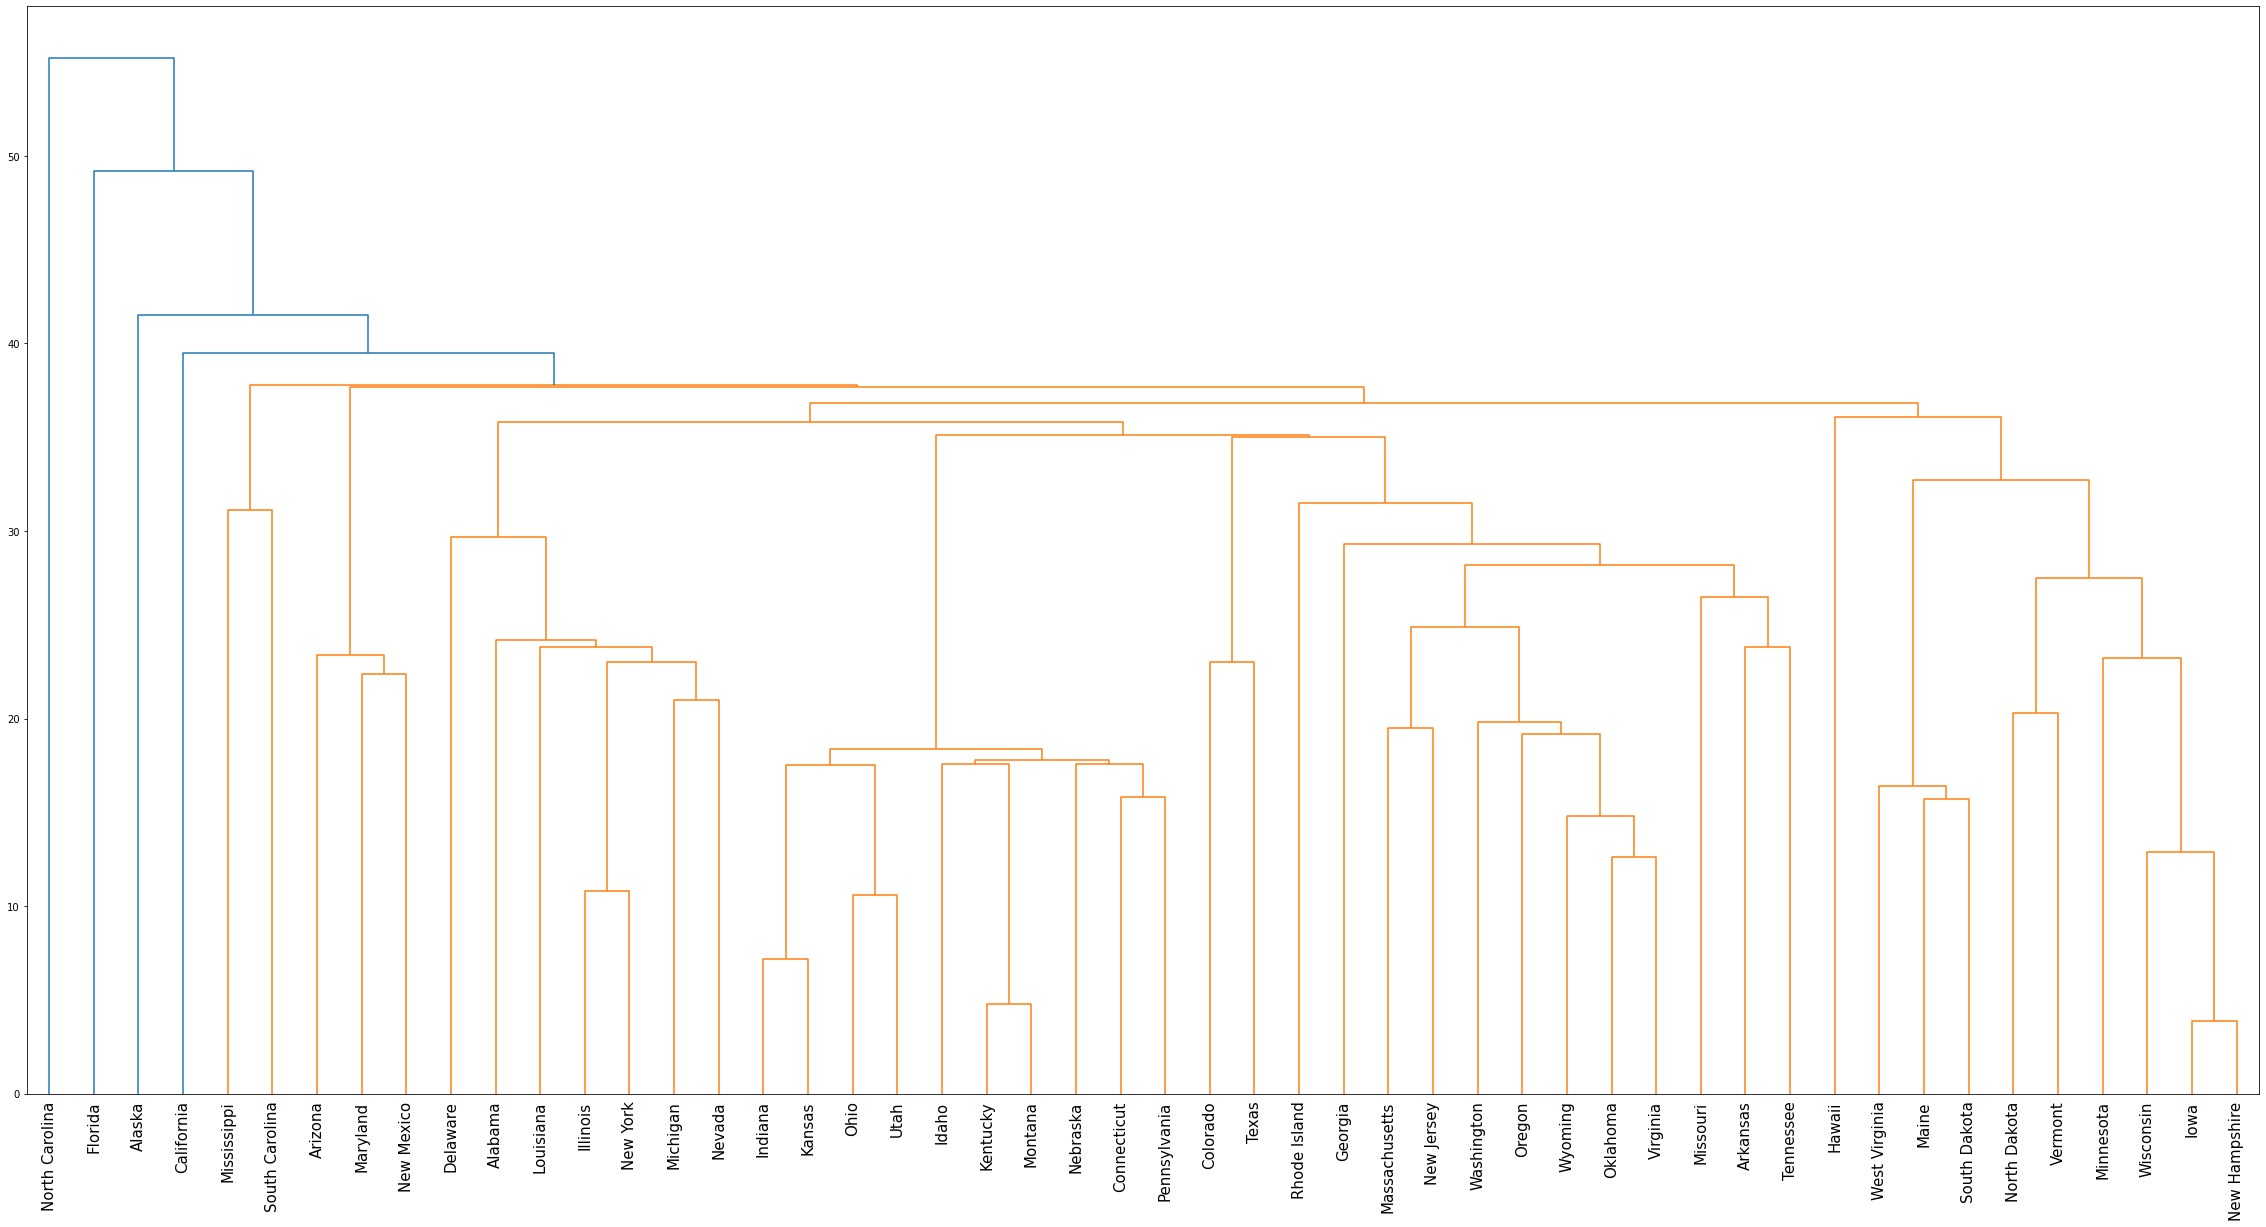

In [26]:
Z = hierarchy.linkage(ytdist, 'single','cityblock')
plt.figure(figsize=(40,20))
dn = hierarchy.dendrogram(Z,leaf_font_size=15,labels=list(df['State']),leaf_rotation=90)